In [1]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.decomposition import TruncatedSVD


In [2]:
# Importing data

with open("D:\\UIC\\Spring 2018\\text analysis\\Assignments\\1\\shutdown.json") as json_data:
    data=json.load(json_data)


# Q1 - Load all tweets and Retweet Usernames

In [3]:
twitter_tweets=[]
retwitter_username=[]
for item in data:
    twitter_tweets.append(item['text'])


for item in data:
    try:
        retwitter_username.append(item['retweeted_status']['user']['screen_name'])
    except:
        
        pass    


# Top 5 Retweet Usernames 

In [4]:
retwitter_username_count=dict((x,retwitter_username.count(x)) for x in set(retwitter_username))
retwitter_username_sorted=sorted(retwitter_username_count,key=retwitter_username_count.get,reverse=True)
top_retwitter={}
for r in retwitter_username_sorted[0:5]:
    top_retwitter[r]=retwitter_username_count[r]
print(top_retwitter)    

{'FoxNews': 1754, 'SenDougJones': 572, 'peterdaou': 547, 'TheDailyEdge': 153, 'BanditRandom': 137}


# Q2 - Removing duplicate tweets

In [5]:
print(len(twitter_tweets))
twitter_tweets_dedup=list(set(twitter_tweets))
print(len(twitter_tweets_dedup))


5000
919


# Q3 - Removing URLs and mentions and renaming hashtags

In [6]:
regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

twitter_tweets_re=[]

for item in twitter_tweets_dedup:
    #Removing urls
    item = pattern_url.sub('', item)
    #Removing mentions
    item = pattern_mention.sub('', item)
    #Chaning hashtag sign (#) to 'hashtag_'
    item = pattern_hashtag.sub(r'hashtag_\1', item)
    twitter_tweets_re.append(item)



# Binary Vectorization

In [7]:
Binary = CountVectorizer(binary = True)   # gives the class
Binary_Vec = Binary.fit_transform(twitter_tweets_re)       # fit means data should be fitted into the model and immediatly transform
X=Binary_Vec.toarray()
print(X)
print(X.shape)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(919, 3069)


In [8]:
Binary.get_feature_names()
vocab=Binary.vocabulary_
s= [re.search(r'hashtag_\w+',x).group(0) for x in vocab.keys() if re.search(r'hashtag_\w+',x)] # Selecting hashtags


# Top 5 popular hashtag

In [9]:
hashtag={}
for item in s:
    col=vocab[item]
    hashtag[item]=np.sum(X[:,col],axis=0)

hashtag_sorted=sorted(hashtag,key=hashtag.get,reverse=True)
hashtag_sorted
top_hashtag={}
for r in hashtag_sorted[0:6]:
    top_hashtag[r]=hashtag[r]
print('Top 5 Hashtags:',top_hashtag)


Top 5 Hashtags: {'hashtag_shutdown': 712, 'hashtag_trumpshutdown': 62, 'hashtag_trump': 36, 'hashtag_schumershutdown': 31, 'hashtag_shutdown2018': 23, 'hashtag_daca': 23}


# Q4 - Mapping document to term matrix to 2D space and plot it using binary vectorization

Dimension (919, 3069) -> (919, 2)


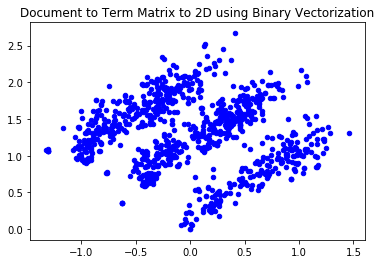

In [10]:
#Reduce dimension
lsa = TruncatedSVD(2)
X_2d = lsa.fit_transform(Binary_Vec)

print("Dimension %s -> %s" % (Binary_Vec.shape, X_2d.shape))

colors = 'b'


plt.scatter(X_2d[:,1], X_2d[:,0],20, c = colors)
plt.title('Document to Term Matrix to 2D using Binary Vectorization')
plt.show() 


# Mapping document to term matrix to 2D space and plot it using count vectorization

In [11]:
count_v = CountVectorizer(binary=False)
count_vec = count_v.fit_transform(twitter_tweets_re)       # fit means data should be fitted into the model and immediatly transform
X1=count_vec.toarray()
X1.shape

(919, 3069)

Dimension (919, 3069) -> (919, 2)


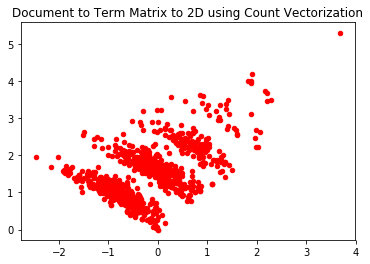

In [12]:
lsa = TruncatedSVD(2)
CV_2d = lsa.fit_transform(count_vec)

print("Dimension %s -> %s" % (count_vec.shape, CV_2d.shape))

colors = 'r'

plt.scatter(CV_2d[:,1], CV_2d[:,0],20, c = colors)
plt.title('Document to Term Matrix to 2D using Count Vectorization')
plt.show() 

# Mapping document to term matrix to 2D space and plot it using TF-IDF vectorization.

Dimension (919, 3069) -> (919, 2)


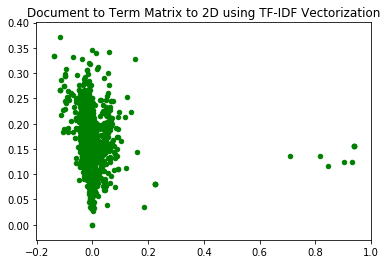

In [13]:
vect = TfidfVectorizer(binary = True)
tfidf_vec = vect.fit_transform(twitter_tweets_re)

tfidf_2d = lsa.fit_transform(tfidf_vec)

print("Dimension %s -> %s" % (tfidf_vec.shape, tfidf_2d.shape))

colors = 'g'

plt.scatter(tfidf_2d[:,1], tfidf_2d[:,0],20, c = colors)
plt.title('Document to Term Matrix to 2D using TF-IDF Vectorization')
plt.show() 

# Q5 - Co-occurance analysis

In [14]:
# Selecting hashtags from each tweet 

tweets_hastags=[]
for item in twitter_tweets_re:
    s2=re.findall(r'hashtag_\w+',item)
    s2_join = " ".join(s2)
    tweets_hastags.append(s2_join)
print(len(tweets_hastags))

# Performing Binary Vectorization 

Binary_hash = CountVectorizer(binary = True,ngram_range=(1,1))   # gives the class
Binary_hash_Vec = Binary_hash.fit_transform(tweets_hastags)       # fit means data should be fitted into the model and immediatly transform
X_hash=Binary_hash_Vec.toarray()
print(X_hash.shape)

Binary_hash.get_feature_names()
vocab_hash=Binary_hash.vocabulary_


919
(919, 423)


In [15]:
Xc = (Binary_hash_Vec.T.dot(Binary_hash_Vec)) # this is co-occurrence matrix in sparse csr format

#to remove its own count with itself, substract the total count of each hastag from the diagonals 

col_sum=X_hash.sum(axis=0)
X_d = np.zeros((423, 423), int)
for item in range(len(col_sum)):
    X_d[item][item]=col_sum[item]
Xd=Xc.todense()
Xfin=Xd-X_d
print(Xd)
print(Xfin)

[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 1 0]
 [0 0 0 ..., 1 1 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]]


# Finding which two hashtags appear together 

In [16]:
Xfin = np.array(Xfin)
print(Xfin)
Xfin[np.tril_indices_from(Xfin, -1)] = 0   #getting lower traingular matrix

# finding index of the 2 hashtags occuring together maximum times

ind = np.unravel_index(np.argsort(Xfin, axis=None)[-2:], Xfin.shape)
print(ind)
length=len(ind[0])
list_a=[]
list_b=[]
for item in range(length):
    list_a.append(ind[0][item])
    list_a.append(ind[1][item])
    list_b.append(list_a)
    list_a=[]
    
    
print(list_b)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]]
(array([339, 339], dtype=int64), array([380, 388], dtype=int64))
[[339, 380], [339, 388]]


In [17]:
# getting 2 hashtags together mostly and second mostly 

top_2_names=[]
top_2_hashtags={}
for item in range(len(list_b)):
    for key,value in vocab_hash.items():
        if value==list_b[item][0]:
            top_2_names.append(key)
    for key,value in vocab_hash.items():
        if value==list_b[item][1]:
            top_2_names.append(key)
    top_2_hashtags[" ".join(top_2_names)]=Xfin[list_b[item][0],list_b[item][1]]
    top_2_names=[]
    
#print(top_2_hashtags)  

top_2_hashtags_sorted=sorted(top_2_hashtags,key=top_2_hashtags.get,reverse=True)
top_2_hashtags_sorted
top_hashtag_together={}
for r in top_2_hashtags_sorted:
    top_hashtag_together[r]=top_2_hashtags[r]
print('Top 2 Hashtags found together:',top_hashtag_together)

Top 2 Hashtags found together: {'hashtag_shutdown hashtag_trumpshutdown': 50, 'hashtag_shutdown hashtag_trump': 34}
